## 任务4 模型评估

内容：记录5个模型（逻辑回归、SVM、决策树、随机森林、XGBoost）关于accuracy、precision，recall和F1-score、auc值的评分表格，并画出ROC曲线

DDL：20190813 10:00pm

## 1 建模

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# 导入task2处理后的数据
df3 = pd.read_csv('./data_clean.csv')
df3.head()

,history_fail_fee,trans_fail_top_count_enum_last_1_month,loans_score,apply_score,latest_one_month_fail,loans_overdue_count,max_cumulative_consume_later_1_month,trans_amount_3_month,repayment_capability,latest_query_day,...,rank_trad_1_month,consume_top_time_last_1_month,latest_six_month_loan,latest_one_month_suc,latest_six_month_apply,trans_activity_month,transd_mcc,latest_three_month_apply,take_amount_in_later_12_month_highest,status
0,7.0,1.0,552.0,583.0,0.0,2.0,2170,34030,19890,12.0,...,0.40,4.0,13.0,1.0,8.0,0.55,17.0,5.0,0,1
1,4.0,0.0,635.0,653.0,1.0,0.0,2100,10590,16970,4.0,...,0.35,13.0,8.0,2.0,8.0,1.00,19.0,6.0,2000,0
2,2.0,3.0,633.0,654.0,1.0,0.0,0,5710,9710,2.0,...,1.00,0.0,4.0,1.0,14.0,1.00,13.0,5.0,0,1
3,26.0,1.0,542.0,595.0,0.0,4.0,8140,91690,6210,2.0,...,0.15,6.0,34.0,2.0,17.0,0.57,22.0,16.0,2000,0
4,25.0,3.0,479.0,541.0,0.0,6.0,1000,9770,11150,22.0,...,0.65,0.0,10.0,0.0,9.0,1.00,13.0,8.0,0,1


In [3]:
feature = df3.iloc[:, :-1]
label = df3.iloc[:, -1]

In [4]:
feature.shape

(4455, 50)

In [5]:
label.shape

(4455,)

In [6]:
# 拆分训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(feature,label,test_size = 0.3,random_state=2018)

In [7]:
# 数据标准化处理
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [17]:
# 逻辑回归
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# SVM
svm_clf = SVC(kernel='linear')
svm_clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
# 决策树
tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
# 随机森林
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
# xgboost
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

## 2 模型评估

In [20]:
from sklearn.metrics import accuracy_score,precision_score,\
recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_predict as cvp

In [29]:
y_train_logreg = log_reg.predict(x_train)
y_train_svm = svm_clf.predict(x_train)
y_train_treeclf = tree_clf.predict(x_train)
y_train_rfclf = rf_clf.predict(x_train)
y_train_xgbclf = xgb_clf.predict(x_train)
y_test_logreg = log_reg.predict(x_test)
y_test_svm = svm_clf.predict(x_test)
y_test_treeclf = tree_clf.predict(x_test)
y_test_rfclf = rf_clf.predict(x_test)
y_test_xgbclf = xgb_clf.predict(x_test)
# 交叉验证预测
y_score_logreg = cvp(log_reg,x_train,y_train,cv = 10,method = 'decision_function')
y_score_svm = cvp(svm_clf,x_train,y_train,cv = 10,method = 'decision_function')
y_score_treeclf = cvp(tree_clf,x_train,y_train,cv = 10,method='predict_proba')[:,1]
y_score_rfclf = cvp(rf_clf,x_train,y_train,cv = 10,method='predict_proba')[:,1]
y_score_xgbclf = cvp(xgb_clf,x_train,y_train,cv = 10,method='predict_proba')[:,1]

D:\Software\Anaconda\installation\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Software\Anaconda\installation\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:
def model_profile(y_train,y_test,y_train_pred,y_test_pred,y_score,model_name):
    print('for model {}:\n'.format(str(model_name)))
    print('accuracy:\n')
    print('train:{}\n test:{}\n'.format(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred)))
    print('precision:\n')
    print('train:{}\n test:{}\n'.format(precision_score(y_train,y_train_pred),precision_score(y_test,y_test_pred)))
    print('recall:\n')
    print('train:{}\n test:{}\n'.format(recall_score(y_train,y_train_pred),recall_score(y_test,y_test_pred)))
    print('f1-score:\n')
    print('train:{}\n test:{}\n'.format(f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)))
    print('AUC:\n')
    print('train:{}\n test:{}\n'.format(roc_auc_score(y_train,y_train_pred),roc_auc_score(y_test,y_test_pred)))
    # print('ROC curve:\n')
    fpr,tpr,thresholds = roc_curve(y_train,y_score)
    plot_roc_curve(fpr,tpr,model_name)

In [40]:
import matplotlib.pyplot as plt
%matplotlib notebook
def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,linewidth = 2,label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel = ('False Positive Rate')
    plt.ylabel = ('True Positive Rate')
    plt.show()
    plt.legend()

for model logistic:

accuracy:

train:0.7985888389993585
 test:0.7913238593866866

precision:

train:0.7128463476070529
 test:0.6243093922651933

recall:

train:0.35508155583437895
 test:0.3487654320987654

f1-score:

train:0.47403685092127307
 test:0.44752475247524753

AUC:

train:0.6529823979085725
 test:0.6408190437887706



<IPython.core.display.Javascript object>


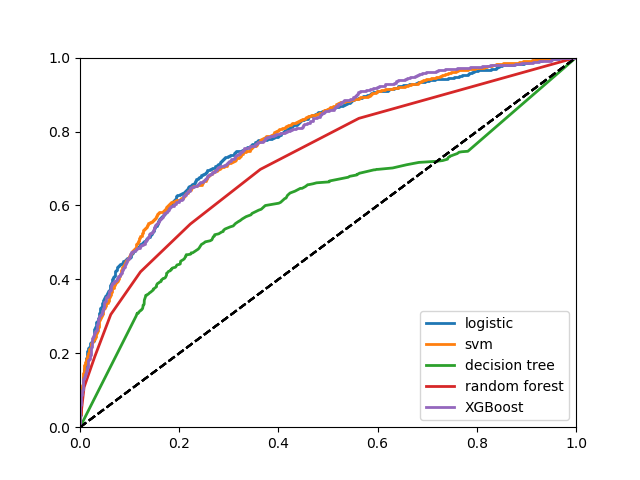

for model svm:

accuracy:

train:0.7886465683130212
 test:0.7913238593866866

precision:

train:0.776
 test:0.7027027027027027

recall:

train:0.24341279799247176
 test:0.24074074074074073

f1-score:

train:0.3705826170009551
 test:0.3586206896551724

AUC:

train:0.6096426333779679
 test:0.6040821176556616

for model decision tree:

accuracy:

train:0.9441949967928159
 test:0.7427075542258789

precision:

train:0.9534206695778749
 test:0.46621621621621623

recall:

train:0.821831869510665
 test:0.42592592592592593

f1-score:

train:0.8827493261455526
 test:0.44516129032258067

AUC:

train:0.9040223544020365
 test:0.6349767832985997

for model random forest:

accuracy:

train:0.9846055163566388
 test:0.7830964846671653

precision:

train:0.9986684420772304
 test:0.6231884057971014

recall:

train:0.9410288582183187
 test:0.2654320987654321

f1-score:

train:0.9689922480620156
 test:0.37229437229437234

AUC:

train:0.9702990047231189
 test:0.6070497117716599

for model XGBoost:

accuracy

In [41]:
model_profile(y_train,y_test,y_train_logreg,y_test_logreg,y_score_logreg,'logistic') # 逻辑回归
model_profile(y_train,y_test,y_train_svm,y_test_svm,y_score_svm,'svm') # svm
model_profile(y_train,y_test,y_train_treeclf,y_test_treeclf,y_score_treeclf,'decision tree') # 决策树
model_profile(y_train,y_test,y_train_rfclf,y_test_rfclf,y_score_rfclf,'random forest') # 随机森林
model_profile(y_train,y_test,y_train_xgbclf,y_test_xgbclf,y_score_xgbclf,'XGBoost') # XGBoost